### Step 8 – K-Nearest Neighbors (KNN)

1. Train a KNN model using the training data.
2. Plot the **decision boundary** for each chosen k.
3. Compare performance metrics (accuracy, precision, recall, F1-score) with other models.
***

### ⚙️ When to Use K-Nearest Neighbors (KNN)

- ✅ Use it when:
  - You want a **simple, non-parametric** model that adapts directly to data distribution.  
  - The dataset is **small** and the input space is **low-dimensional**.  
  - You expect **non-linear** decision boundaries that depend on local structure.  

- 🚫 Avoid it when:
  - The dataset is **large** — inference is slow because every prediction compares all samples.  
  - You have **many features** (curse of dimensionality).  
  - The data is not **standardized** or contains **outliers**, since KNN is sensitive to distance scaling.  
***

### 🤖 **Model Hyperparameters**

> #### Data Configuration
- Train/Test split: `test_size = 0.20`, `random_state = 42`, `stratify = y`

> #### K-Nearest Neighbors (KNN)
- `StandardScaler()` — feature scaling for distance-based metric  
- `n_neighbors = 2` — number of nearest neighbors used in classification  
- `weights = "uniform"` — all neighbors have equal voting weight
***

In [2]:
%run 00-setup.py

In [ ]:
from ml.data import load_dataset
from tasks.knn import run_knn, run_knn_grid
from ml.viz import plt_dboundary, plt_cmatrix
from sklearn.model_selection import train_test_split

In [4]:
X, y, _ = load_dataset("../data/data_bivariate_gaussian.npz")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
res = run_knn(X_train, y_train, X_test, y_test, params={"n_neighbors": 2, "weights": "uniform"})

res["test"]["metrics"]

{'accuracy': 0.9333333333333333,
 'precision': 0.9642857142857143,
 'recall': 0.9,
 'f1': 0.9310344827586207}

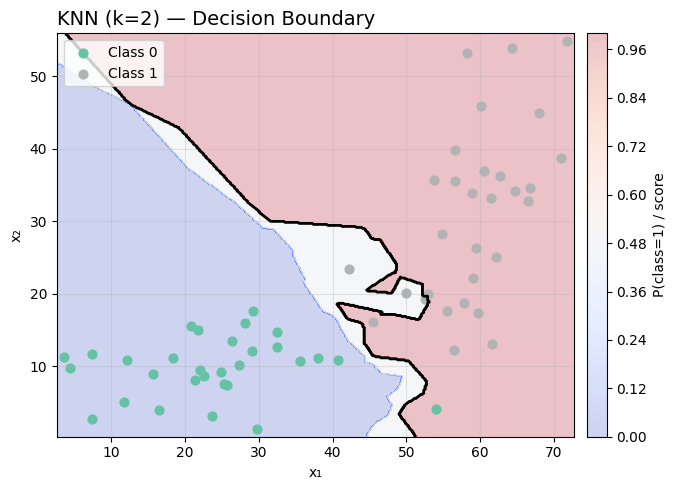

(<Figure size 700x500 with 2 Axes>,
 <Axes: title={'left': 'KNN (k=2) — Decision Boundary'}, xlabel='x₁', ylabel='x₂'>)

In [7]:
plt_dboundary(res["model"], X_test, y_test, title="KNN (k=2) — Decision Boundary")

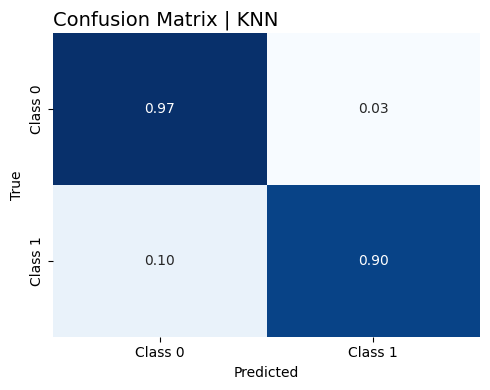

(<Figure size 500x400 with 1 Axes>,
 <Axes: title={'left': 'Confusion Matrix | KNN'}, xlabel='Predicted', ylabel='True'>)

In [8]:
plt_cmatrix(
    y_true=y_test,
    y_pred=res["test"]["y_pred"],
    title="Confusion Matrix | KNN"
)

***

>> GRID

Best k: 3 | Test metrics: {'accuracy': 0.9833333333333333, 'precision': 0.967741935483871, 'recall': 1.0, 'f1': 0.9836065573770492}


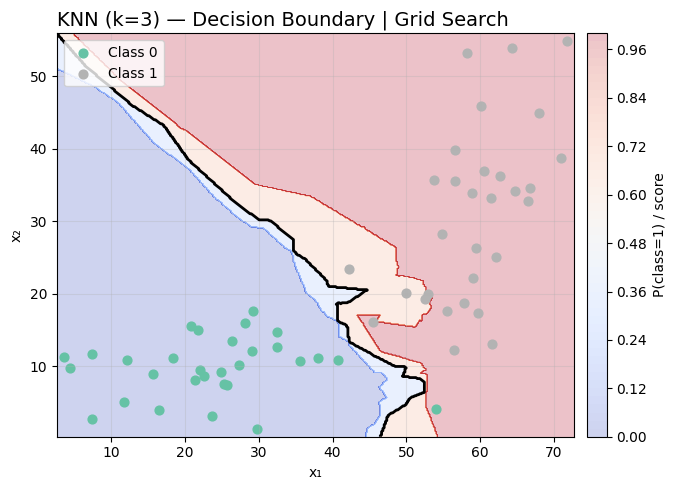

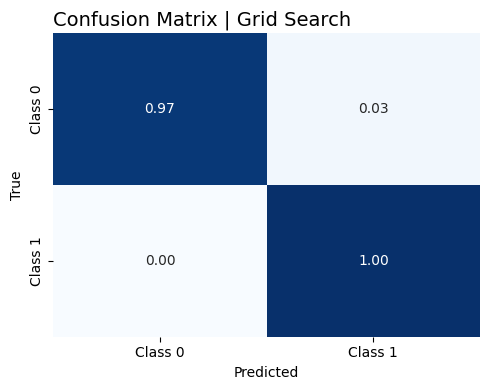

(<Figure size 500x400 with 1 Axes>,
 <Axes: title={'left': 'Confusion Matrix | Grid Search'}, xlabel='Predicted', ylabel='True'>)

In [10]:
ks = range(1, 20, 1)
grid = run_knn_grid(X_train, y_train, X_test, y_test, ks=ks, weights="uniform")

best_k = max(ks, key=lambda k: grid[k]["test"]["metrics"]["accuracy"])
best_res = grid[best_k]

print("Best k:", best_k, "| Test metrics:", best_res["test"]["metrics"])

plt_dboundary(best_res["model"], X_test, y_test, title=f"KNN (k={best_k}) — Decision Boundary | Grid Search")

plt_cmatrix(
    y_true=y_test,
    y_pred=best_res["test"]["y_pred"],
    title="Confusion Matrix | Grid Search"
)